In [37]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use(["science","no-latex", "/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle"])
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [38]:
from LoadMultiFiles import LoadOneFileUproot
dir_evts = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/PSD/root_SaveTimeCharge/user_PSD_0__SN.root", name_branch="evt", return_list=False)
print(dir_evts.keys())

dict_keys(['PSDVar', 'Time', 'Charge', 'isHam'])


In [39]:
# dir_map = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/root/sn_tag_0.root", name_branch='evtTruth', return_list=False)
dir_map = LoadOneFileUproot("/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/myJUNOCommon/share/tag_event/sn_tag_0_save_TimeTruth.root", name_branch='evtTruth', return_list=False)
print(dir_map.keys())

dict_keys(['evtID', 'nuE', 'evtType', 'recE', 'recX', 'recY', 'recZ', 'ratioSN', 'ratioDN', 'ratioAP', 'ratioDNAP', 'TriggerTime', 'TriggerTimeInterval', 'TimeTruth', 'PMTIDTruth', 'fileNo', 'detID', 'entryCalib', 'entryGen'])


In [52]:
# bins = np.array(list(range(-200, -20, 3))+[-20, -17, -14, -11, -8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22, 28, 34, 40, 46, 52, 58, 64, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366, 402, 440, 480, 522, 566, 612, 660, 710, 762,816]+list(range(866, 1200, 50)))
bins = np.arange(-200, 1200,6)

In [56]:
print(list(bins))

[-200, -194, -188, -182, -176, -170, -164, -158, -152, -146, -140, -134, -128, -122, -116, -110, -104, -98, -92, -86, -80, -74, -68, -62, -56, -50, -44, -38, -32, -26, -20, -14, -8, -2, 4, 10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 76, 82, 88, 94, 100, 106, 112, 118, 124, 130, 136, 142, 148, 154, 160, 166, 172, 178, 184, 190, 196, 202, 208, 214, 220, 226, 232, 238, 244, 250, 256, 262, 268, 274, 280, 286, 292, 298, 304, 310, 316, 322, 328, 334, 340, 346, 352, 358, 364, 370, 376, 382, 388, 394, 400, 406, 412, 418, 424, 430, 436, 442, 448, 454, 460, 466, 472, 478, 484, 490, 496, 502, 508, 514, 520, 526, 532, 538, 544, 550, 556, 562, 568, 574, 580, 586, 592, 598, 604, 610, 616, 622, 628, 634, 640, 646, 652, 658, 664, 670, 676, 682, 688, 694, 700, 706, 712, 718, 724, 730, 736, 742, 748, 754, 760, 766, 772, 778, 784, 790, 796, 802, 808, 814, 820, 826, 832, 838, 844, 850, 856, 862, 868, 874, 880, 886, 892, 898, 904, 910, 916, 922, 928, 934, 940, 946, 952, 958, 964, 970, 976, 982, 988, 994, 1

In [42]:
from matplotlib.backends.backend_pdf import PdfPages
v_tags = ["pES", "AfterPulse"]
path_save = "/afs/ihep.ac.cn/users/l/luoxj/PSD_Supernova/code/pdf/"

201it [01:20,  2.49it/s]
201it [01:20,  2.51it/s]


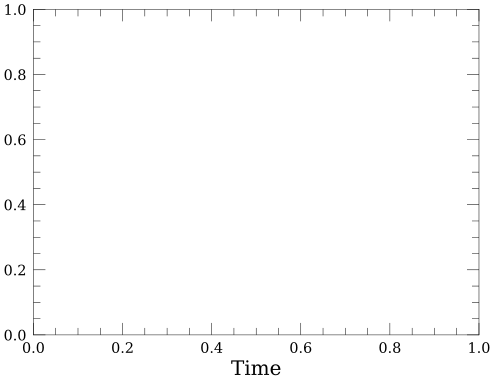

In [57]:
from HistTools import GetBinCenter
import tqdm
from PlotTools import LegendNotRepeated

plot_into_pdf = True

n_to_plot = 200 if plot_into_pdf else 20
if plot_into_pdf:
    dir_pdf = {tag:PdfPages(f"{path_save}{tag}.pdf") for tag in v_tags}
v_colors = ["red", "blue", "green"]
for j, tag in enumerate(v_tags):
    index_tag = ((dir_map["evtType"]==tag)&(dir_map['recE']<3))
    for i, (v_time, v_charge, v_isHam) in tqdm.tqdm(enumerate(zip(dir_evts["Time"][index_tag], dir_evts["Charge"][index_tag], dir_evts["isHam"][index_tag]))):
        if plot_into_pdf:
            plt.figure()
        v_NotisHam = [not IsHam for IsHam in v_isHam]
        v_isHam = (v_isHam==1)
        # h_time = np.histogram(v_time[v_isHam], bins=bins, weights=v_charge[v_isHam])[0]/np.diff(bins)
        h_time = np.histogram(v_time, bins=bins)[0]/np.diff(bins)


        # plt.plot(GetBinCenter(bins), np.array(h_time)/np.max(h_time), color=v_colors[j], label=tag)
        plt.plot(GetBinCenter(bins), np.array(h_time), color=v_colors[j], label=tag)

        if plot_into_pdf:
            dir_pdf[tag].savefig()
            plt.legend()
            plt.close()

        if i>n_to_plot:
            break


plt.xlabel("Time")
LegendNotRepeated()
# plt.ylim(0,30)
if plot_into_pdf:
    for key, pdf in dir_pdf.items():
        pdf.close()
        

In [44]:
for key, pdf in dir_pdf.items():
    pdf.close()

AttributeError: 'NoneType' object has no attribute 'finalize'